In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load the dataset
df = pd.read_csv('sms_spam.csv')

# Display the first few rows
df.head()


,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


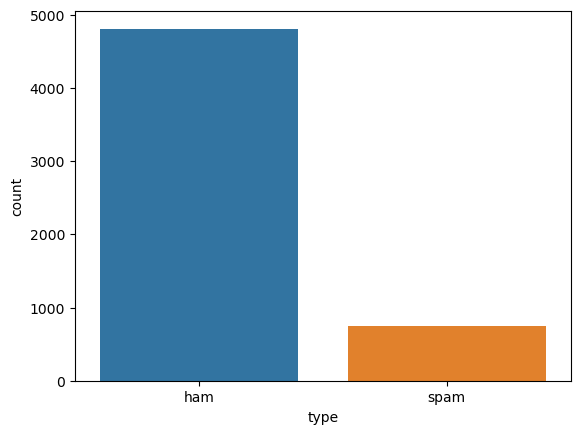

In [3]:
# Check for missing values
df.isnull().sum()

# Visualize data distribution
sns.countplot(x='type', data=df)
plt.show()


In [4]:
# Tokenization and vectorization
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, df['type'], test_size=0.2, random_state=42)


In [6]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [7]:
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.9766187050359713

Confusion Matrix:
 [[946  17]
 [  9 140]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.98      0.99       963
        spam       0.89      0.94      0.92       149

    accuracy                           0.98      1112
   macro avg       0.94      0.96      0.95      1112
weighted avg       0.98      0.98      0.98      1112



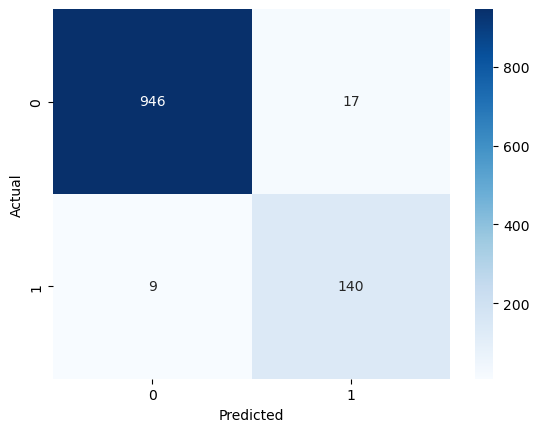

In [8]:
# Example: Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


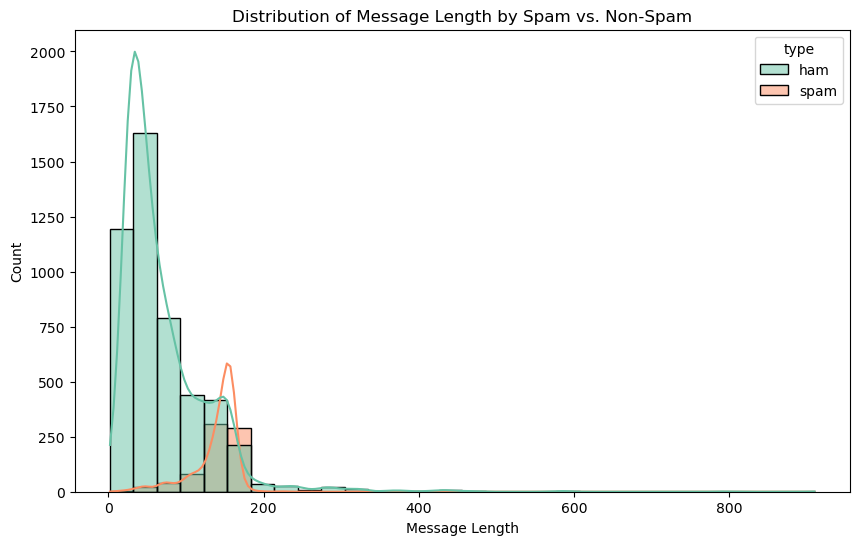

In [9]:
# Visualize the length of messages by spam vs. non-spam
df['message_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(x='message_length', data=df, hue='type', bins=30, kde=True, palette='Set2')
plt.title('Distribution of Message Length by Spam vs. Non-Spam')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()


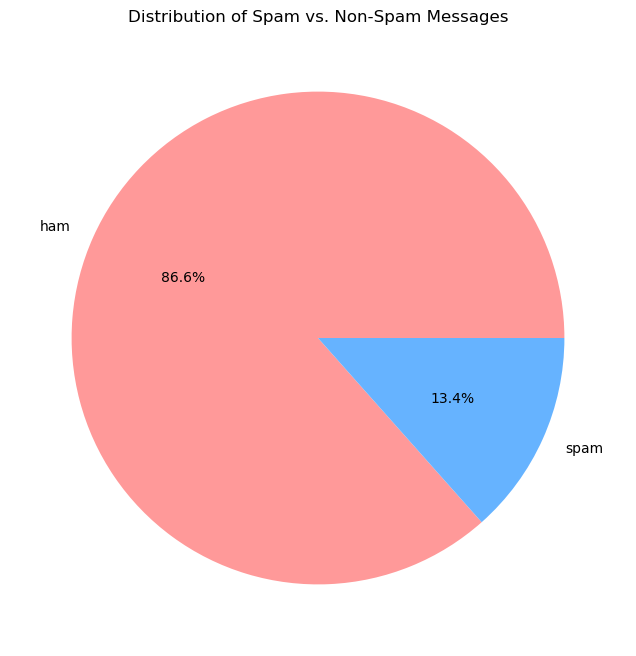

In [10]:
# Pie chart to show the distribution of spam vs. non-spam messages
class_counts = df['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Spam vs. Non-Spam Messages')
plt.show()

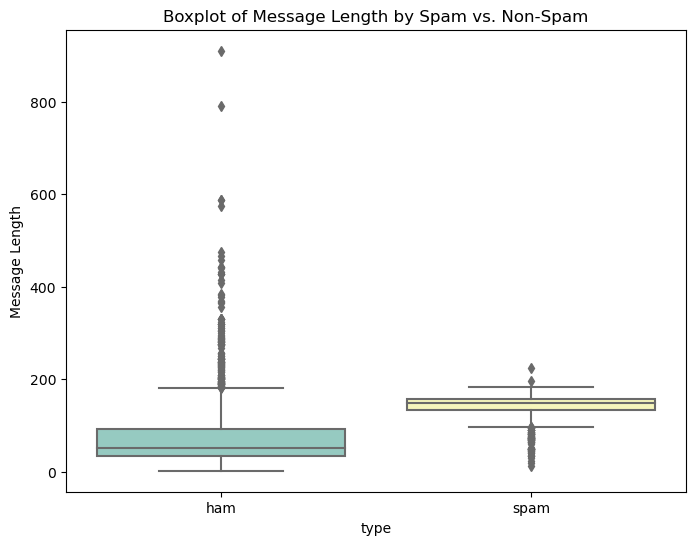

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='message_length', data=df, palette='Set3')
plt.title('Boxplot of Message Length by Spam vs. Non-Spam')
plt.xlabel('type')
plt.ylabel('Message Length')
plt.show()

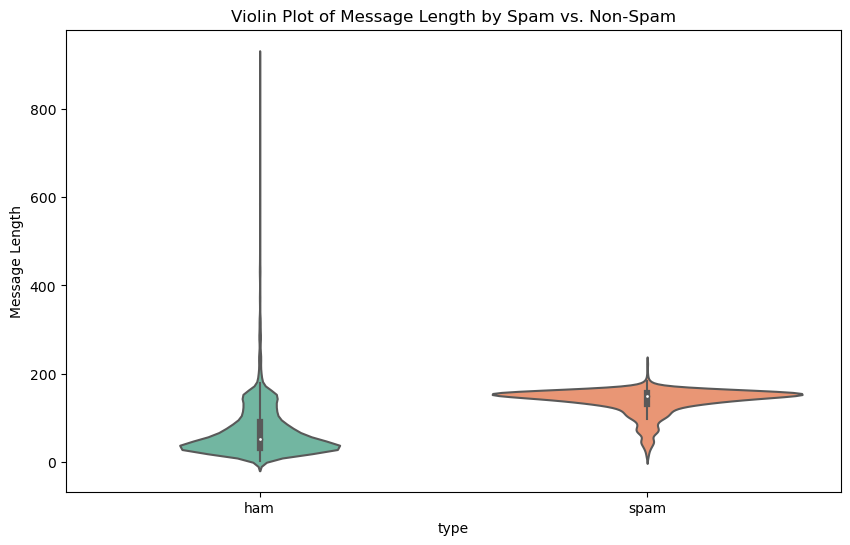

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='type', y='message_length', data=df, palette='Set2')
plt.title('Violin Plot of Message Length by Spam vs. Non-Spam')
plt.xlabel('type')
plt.ylabel('Message Length')
plt.show()

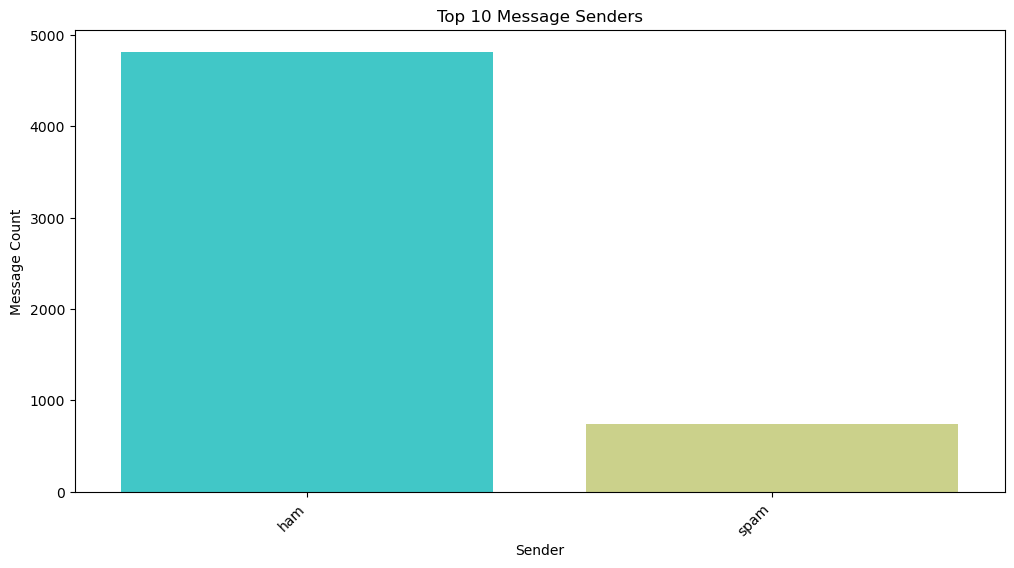

In [13]:
top_senders = df['type'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_senders.index, y=top_senders.values, palette='rainbow')
plt.title('Top 10 Message Senders')
plt.xlabel('Sender')
plt.ylabel('Message Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='message_length', y='text', data=df, hue='type', palette='Set2', alpha=0.7)
plt.title('Scatter Plot: Message Length vs. Number of Exclamation Marks')
plt.xlabel('Message Length')
plt.ylabel('Number of Exclamation Marks')
plt.legend(title='type')
plt.show()

In [ ]:
#Pair Plot for Numeric Features:
plt.figure(figsize=(12, 8))
sns.pairplot(sms_data, hue='label', palette='husl', diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Features by Spam vs. Non-Spam', y=1.02)
plt.show()